In [3]:
import cv2
import os

def extract_frames(video_path, output_folder):
    cap = cv2.VideoCapture(video_path)
    count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        count += 1
        #Guarda un jpg cada 30 frame
        if count % 30 == 0:
            frame_name = f"frame_{count}.jpg"
            cv2.imwrite(f"{output_folder}/{frame_name}", frame)

    cap.release()
    cv2.destroyAllWindows()

#Nombre del video
video_path = "11_6_2-6.mp4"
#Nombre de la carpeta
output_folder = "extraction_test"
os.makedirs(output_folder, exist_ok=True)

#Utiliza la función para extraer frames
extract_frames(video_path, output_folder)


In [2]:
canny_list = []
def count_edges(image):
    #Se transforma a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200) #Se aplica el detector de bordes Canny de la libreria cv2
    edge_count = cv2.countNonZero(edges) #Se cuentan los pixeles
    return edge_count

image3 = cv2.imread("extraction_test\\" + "frame_240.jpg")

val = count_edges(image3)
print(val)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


['frame_120.jpg', 'frame_150.jpg', 'frame_180.jpg', 'frame_210.jpg', 'frame_240.jpg', 'frame_270.jpg', 'frame_30.jpg', 'frame_300.jpg', 'frame_60.jpg', 'frame_90.jpg']


In [ ]:
tuplas = zip(dir_list, canny_list)

#Se ordenan las listas en base a 
tuplas_2 = sorted(tuplas, key=lambda x: x[0])

# Desempaqueta las listas ordenadas
list_1 = [x[0] for x in tuplas_2]
list_2 = [x[1] for x in tuplas_2]

print("Listado de frames:", list_1)
print("Listado de los pixeles blancos (Detector de bordes Canny):", list_2)

Listado de frames: ['frame_120.jpg', 'frame_150.jpg', 'frame_180.jpg', 'frame_210.jpg', 'frame_240.jpg', 'frame_270.jpg', 'frame_30.jpg', 'frame_300.jpg', 'frame_60.jpg', 'frame_90.jpg']
Listado de los pixeles blancos (Detector de bordes Canny): [7392, 7728, 7672, 7998, 7937, 7616, 7978, 7487, 7568, 7775]


In [ ]:
import os
directory = "test1"
name = os.path.join(directory,"test.txt")


if not os.path.exists(directory):
    # Create the directory
    os.makedirs(directory)
    print("El directorio ha sido creado con exito!")
else:
    print("El directorio ya existe!")

# Abrir el archivo en modo escritura
with open(name, "w") as archivo:
    # Escribir cada par de elementos de las listas en una línea del archivo
    for elemento1, elemento2 in zip(list_1, list_2):
        archivo.write(f"{elemento1}->{elemento2} pixeles blancos\n")

El directorio ya existe!


In [ ]:
import cv2


imagen = cv2.imread('extraction_test\\frame_240.jpg')

#Clasificador de rostros pre-entrenado
clasificador_rostros = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)


rostros = clasificador_rostros.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

#Iterar sobre cada rostro detectado
for (x, y, w, h) in rostros:
    #Bounding box
    cv2.rectangle(imagen, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
roi = imagen[y:y+h, x:x+w]
cv2.imwrite("roi.jpg", roi)


In [ ]:
dir_list = os.listdir('extraction_test')
clasificador_rostros = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
for i in dir_list:
    directory = "test1"
    os.makedirs(directory, exist_ok=True)
    imagen = cv2.imread('extraction_test\\' + i)
    gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    rostros = clasificador_rostros.detectMultiScale(gris, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40))

#Iterar sobre cada rostro detectado
    for (x, y, w, h) in rostros:
        #Bounding box
        cv2.rectangle(imagen, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
    roi = imagen[y:y+h, x:x+w]
    cv2.imwrite(f"{directory}//{i[:-4] }_roi.jpg" , roi)




In [ ]:
dir_list = os.listdir('extraction_test')
#Se almacena la cuenta de pixeles blancos de las imagenes en una lista
print(dir_list)
for i in dir_list:
    image = cv2.imread("extraction_test\\" + i)
    # print("C:\\Users\\jpret\\OneDrive\\Escritorio\\seminario_stuff\\frames\\" + i)
    aux = count_edges(image)
    canny_list.append(aux)

(-0.5, 959.5, 539.5, -0.5)

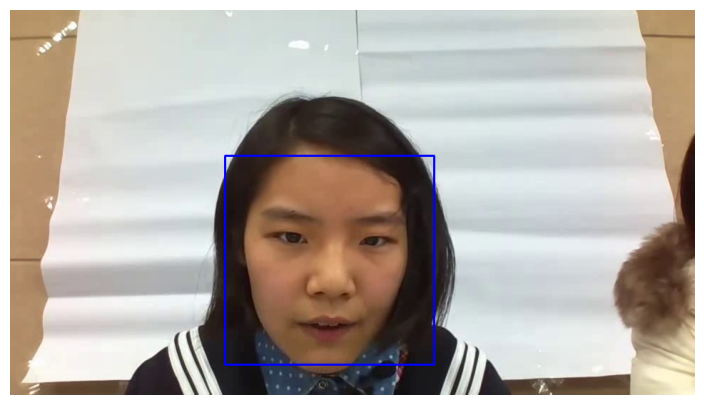

In [ ]:
import matplotlib.pyplot as plt

roi = imagen[y:y+h, x:x+w]
cv2.imwrite("roi.jpg", roi)

img = cv2.cvtColor(imagen,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.axis('off')

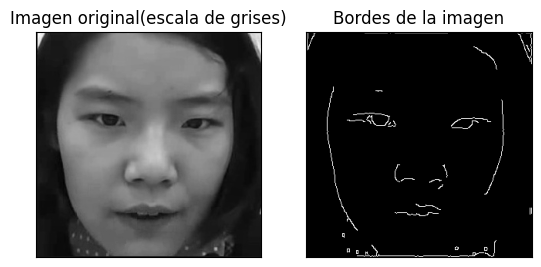

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

image = "roi.jpg"
# Bordes del bounding box
img = cv.imread(image, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Imagen original(escala de grises)'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Bordes de la imagen'), plt.xticks([]), plt.yticks([])
plt.show()